# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

### Import Statements

In [121]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format


### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')


Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
df_data.shape


(962, 16)

In [5]:
df_data.columns


Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [6]:
df_data.sort_values(["year"])


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA


In [7]:
df_data.sort_values(["year"], ascending=False)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR
955,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Charles M. Rice,1952-08-25,"Sacramento, CA",United States of America,United States of America,Male,Rockefeller University,"New York, NY",United States of America,USA
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [8]:
df_data.duplicated().values.any()


False

### Check for NaN Values

In [9]:
df_data.isna().values.any()


True

In [10]:
df_data.isna().any()


year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [11]:
for i in df_data.columns:
    print(f"""null in column {i}: {df_data[f"{i}"].isna().values.sum()}""")


null in column year: 0
null in column category: 0
null in column prize: 0
null in column motivation: 88
null in column prize_share: 0
null in column laureate_type: 0
null in column full_name: 0
null in column birth_date: 28
null in column birth_city: 31
null in column birth_country: 28
null in column birth_country_current: 28
null in column sex: 28
null in column organization_name: 255
null in column organization_city: 255
null in column organization_country: 254
null in column ISO: 28


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [12]:
df_data.birth_date = pd.to_datetime(df_data["birth_date"])


In [13]:
df_data.birth_date


0     1852-08-30
1     1839-03-16
2     1854-03-15
3     1822-05-20
4     1828-05-08
         ...    
957   1949-07-02
958          NaT
959   1965-06-16
960   1952-03-24
961   1931-08-08
Name: birth_date, Length: 962, dtype: datetime64[ns]

#### Add a Column with the Prize Share as a Percentage

In [14]:
df_data["share_pct"] = df_data["prize_share"].apply(pd.eval) * 100


In [15]:
df_data["share_pct"]


0     100.00
1     100.00
2     100.00
3      50.00
4      50.00
       ...  
957    33.33
958   100.00
959    25.00
960    25.00
961    50.00
Name: share_pct, Length: 962, dtype: float64

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [16]:
new_df = df_data.groupby("sex").agg({'sex': pd.Series.count})
fig = px.pie(new_df, values=new_df.sex, names=new_df.index,
             title='Percentage of Male vs. Female Laureates')
fig.show()


In [17]:
#solution
biology = df_data.sex.value_counts()
fig = px.pie(labels=biology.index, 
                values=biology.values,
                title="Percentage of Male vs. Female Winners",
                names=biology.index,
                hole=0.4,)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

/usr/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [18]:
df_data[df_data["sex"] == "Female"].sort_values("year")[0:3]


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


In [19]:
#solution
df_data[df_data.sex == 'Female'].sort_values('year', ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [20]:
name_df = df_data.groupby("full_name").agg({'full_name': pd.Series.count})
name_df.loc[name_df.full_name > 1]


,full_name
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Frederick Sanger,2
John Bardeen,2
Linus Carl Pauling,2
"Marie Curie, née Sklodowska",2
Office of the United Nations High Commissioner for Refugees (UNHCR),2


In [21]:
#solution
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}' \
        ' winners who were awarded the prize more than once.')

col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

There are 6 winners who were awarded the prize more than once.


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [22]:
category_df = df_data.groupby("category").agg({'category': pd.Series.count})
# category_df.sort_values("category")
category_df

,category
category,
Chemistry,186
Economics,86
Literature,117
Medicine,222
Peace,135
Physics,216


In [23]:
fig = px.bar(category_df, x=category_df.index, y='category', color='category', color_continuous_scale='Aggrnyl')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [24]:
prizes_per_category = df_data.category.value_counts()
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')
        
v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [25]:
economics_df = df_data[df_data["category"] == "Economics"]
economics_df.sort_values("year")[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,50.00
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,100.00


In [26]:
#solution
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,50.00
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,100.00


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [27]:
new_df = df_data.groupby(["sex", "category"], as_index=False).count()
new_df = new_df.sort_values("sex", ascending=False)
fig = px.bar(new_df, x=new_df["category"], y=new_df["prize"], color=new_df["sex"],
             title='Number of Prizes Awarded per Category split by Men and Women')
fig.update_layout(xaxis_title='Nobel Prize Category', yaxis_title='Number of Prizes', xaxis={'categoryorder':'total descending'})
fig.show()

In [28]:
#solution part 1
cat_men_women = df_data.groupby(['category', 'sex'], 
                                as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)

In [29]:
#solution part 2
v_bar_split = px.bar(x = cat_men_women.category,
                        y = cat_men_women.prize,
                        color = cat_men_women.sex,
                        title='Number of Prizes Awarded per Category split by Men and Women')

v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                            yaxis_title='Number of Prizes')
v_bar_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [30]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

yearly_data = df_data.groupby(['year'], 
                                as_index=False).agg({'prize': pd.Series.count})

roll_df = yearly_data["prize"].rolling(5).mean()
yearly_data_five = yearly_data[yearly_data["year"] % 5 == 0]
yearly_data_five = yearly_data_five.append(pd.Series({'year':1900}), ignore_index=True)
yearly_data_five = yearly_data_five.append(pd.Series({'year':1940}), ignore_index=True)


fig = px.scatter(yearly_data, x="year", y="prize",
             title='Number of Prizes each year')

fig.update_layout(xaxis_title='Year', yaxis_title='Number of Prizes', xaxis=dict(
        tickmode = 'array',
        tickvals = yearly_data_five["year"],
        ticktext = yearly_data_five["year"])
    )
fig.show()


/tmp/ipykernel_10842/4151885587.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_10842/4151885587.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



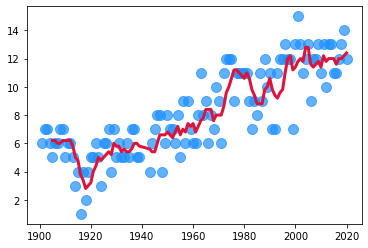

In [31]:
#solution
prize_per_year = df_data.groupby(by='year').count().prize 
moving_average = prize_per_year.rolling(window=5).mean()
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

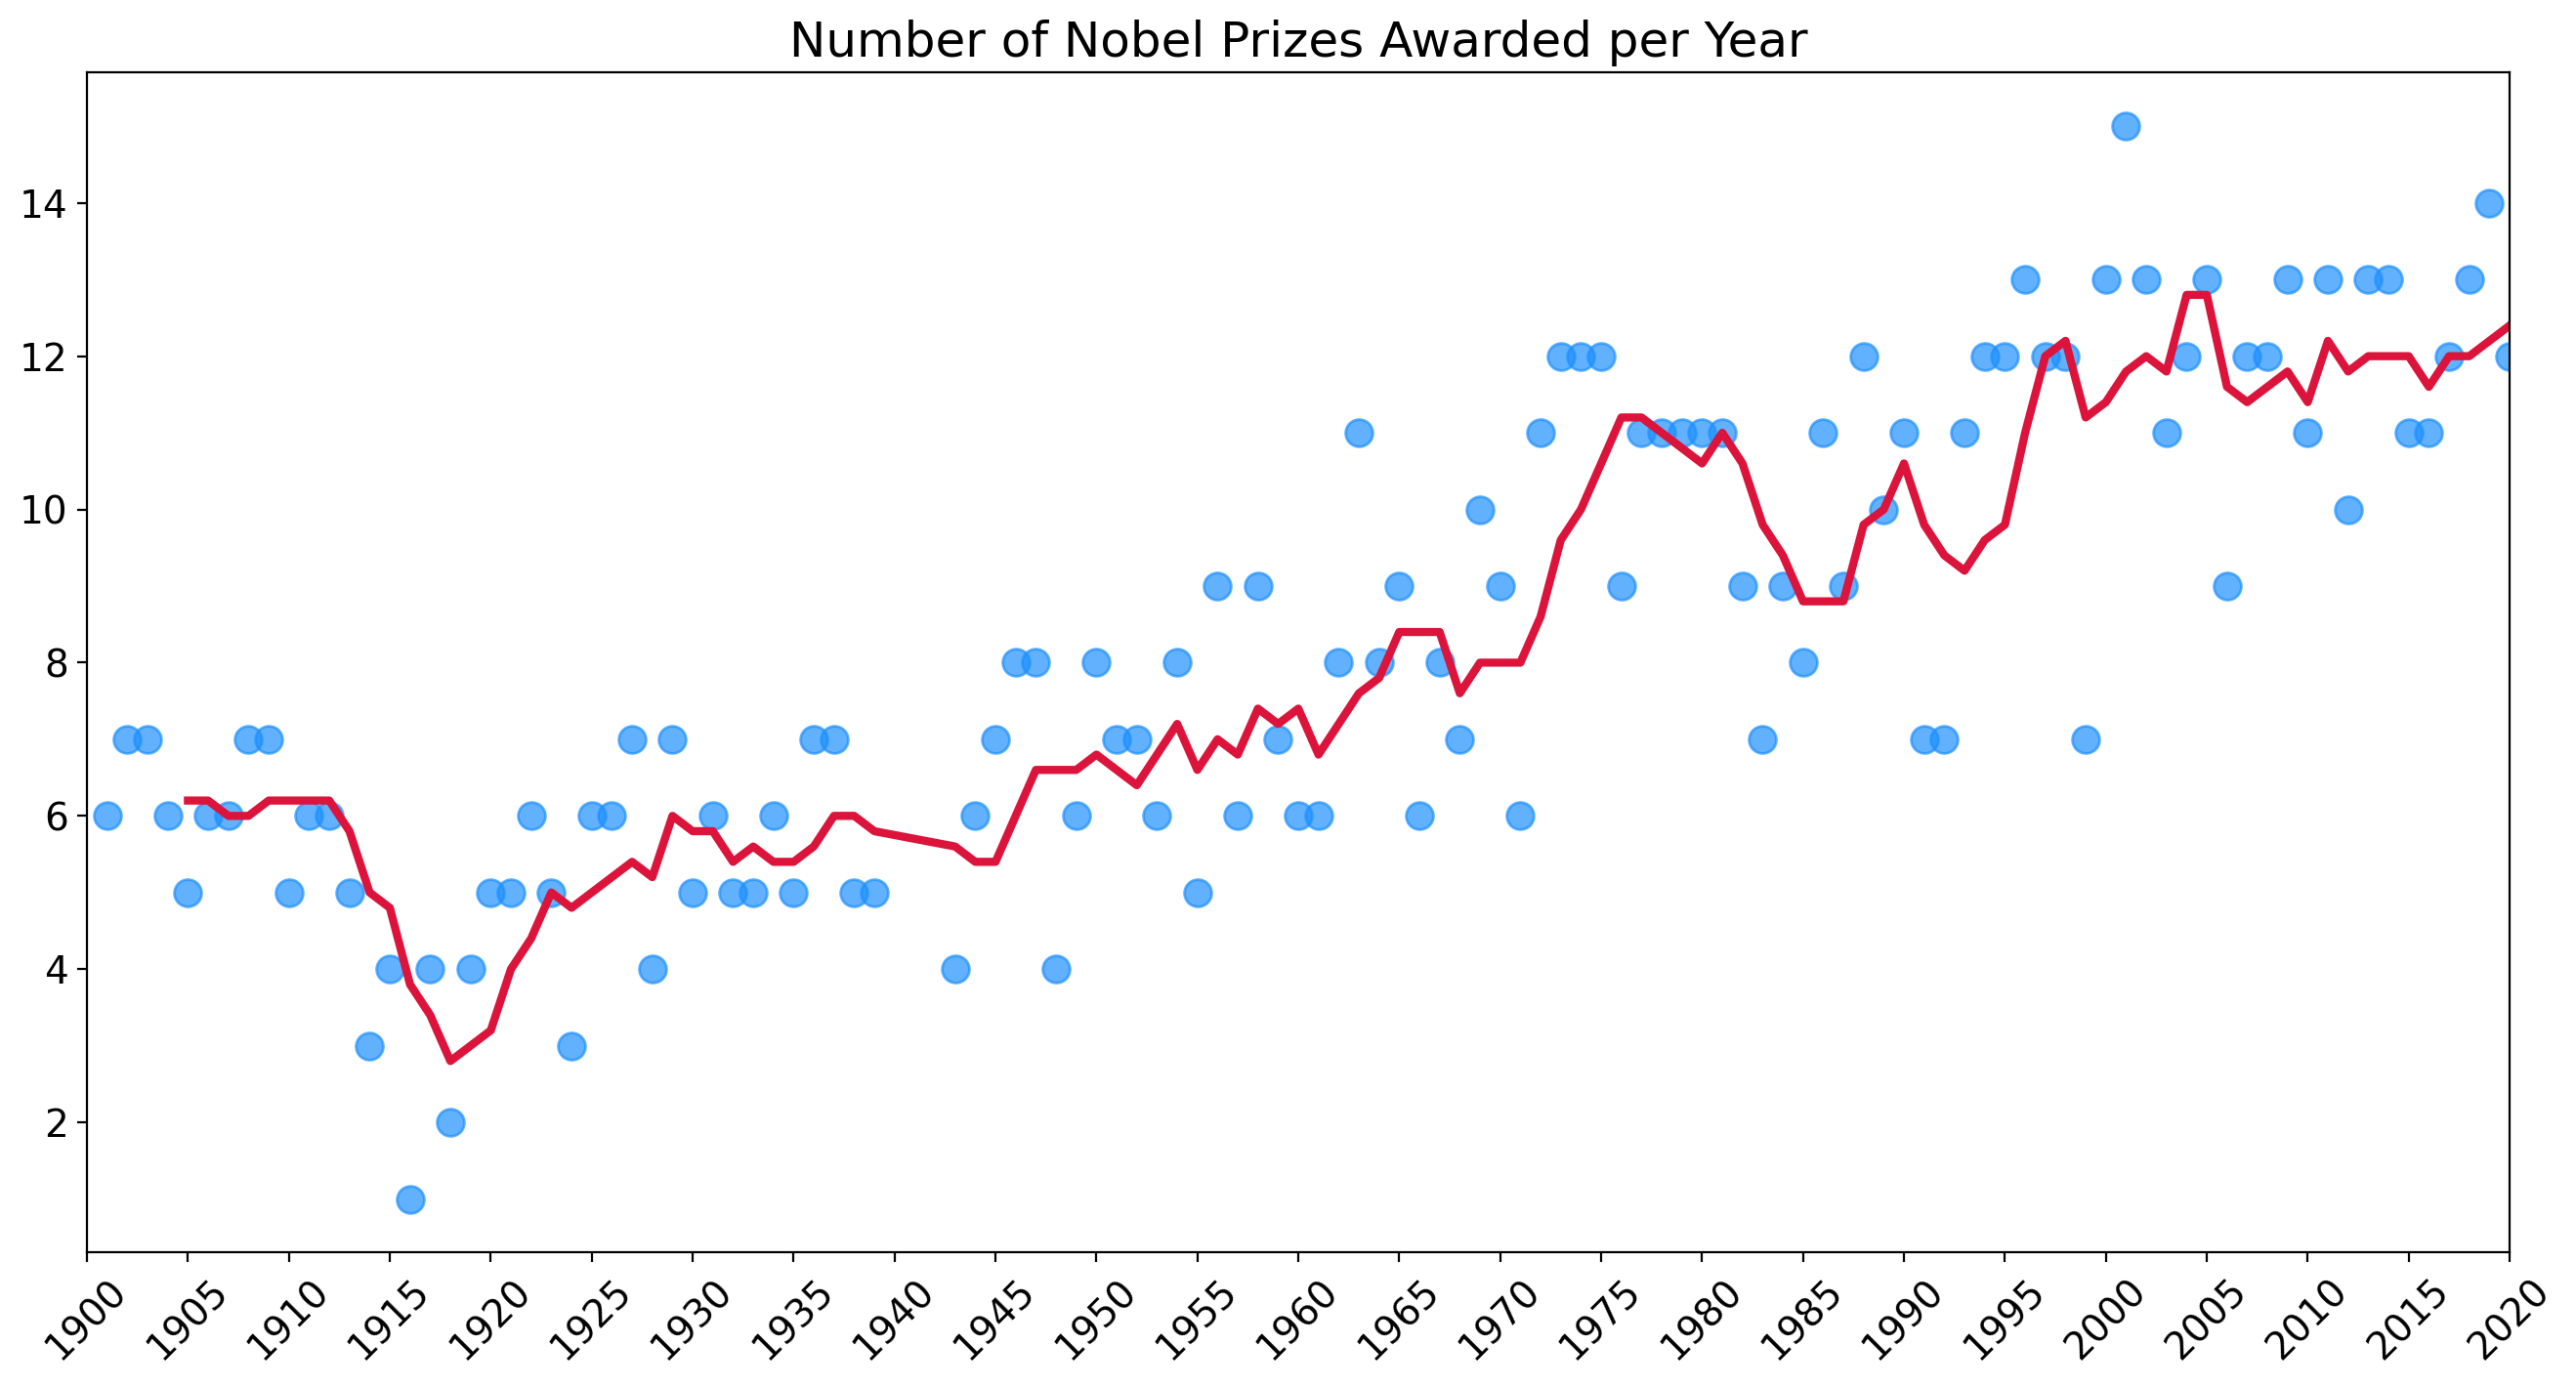

In [32]:
#solution
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
#ticks were created manually by using numpy starting from 1900 as year starting to 2021 as year end of data
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [33]:
#share_pct is the prize share percentage
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

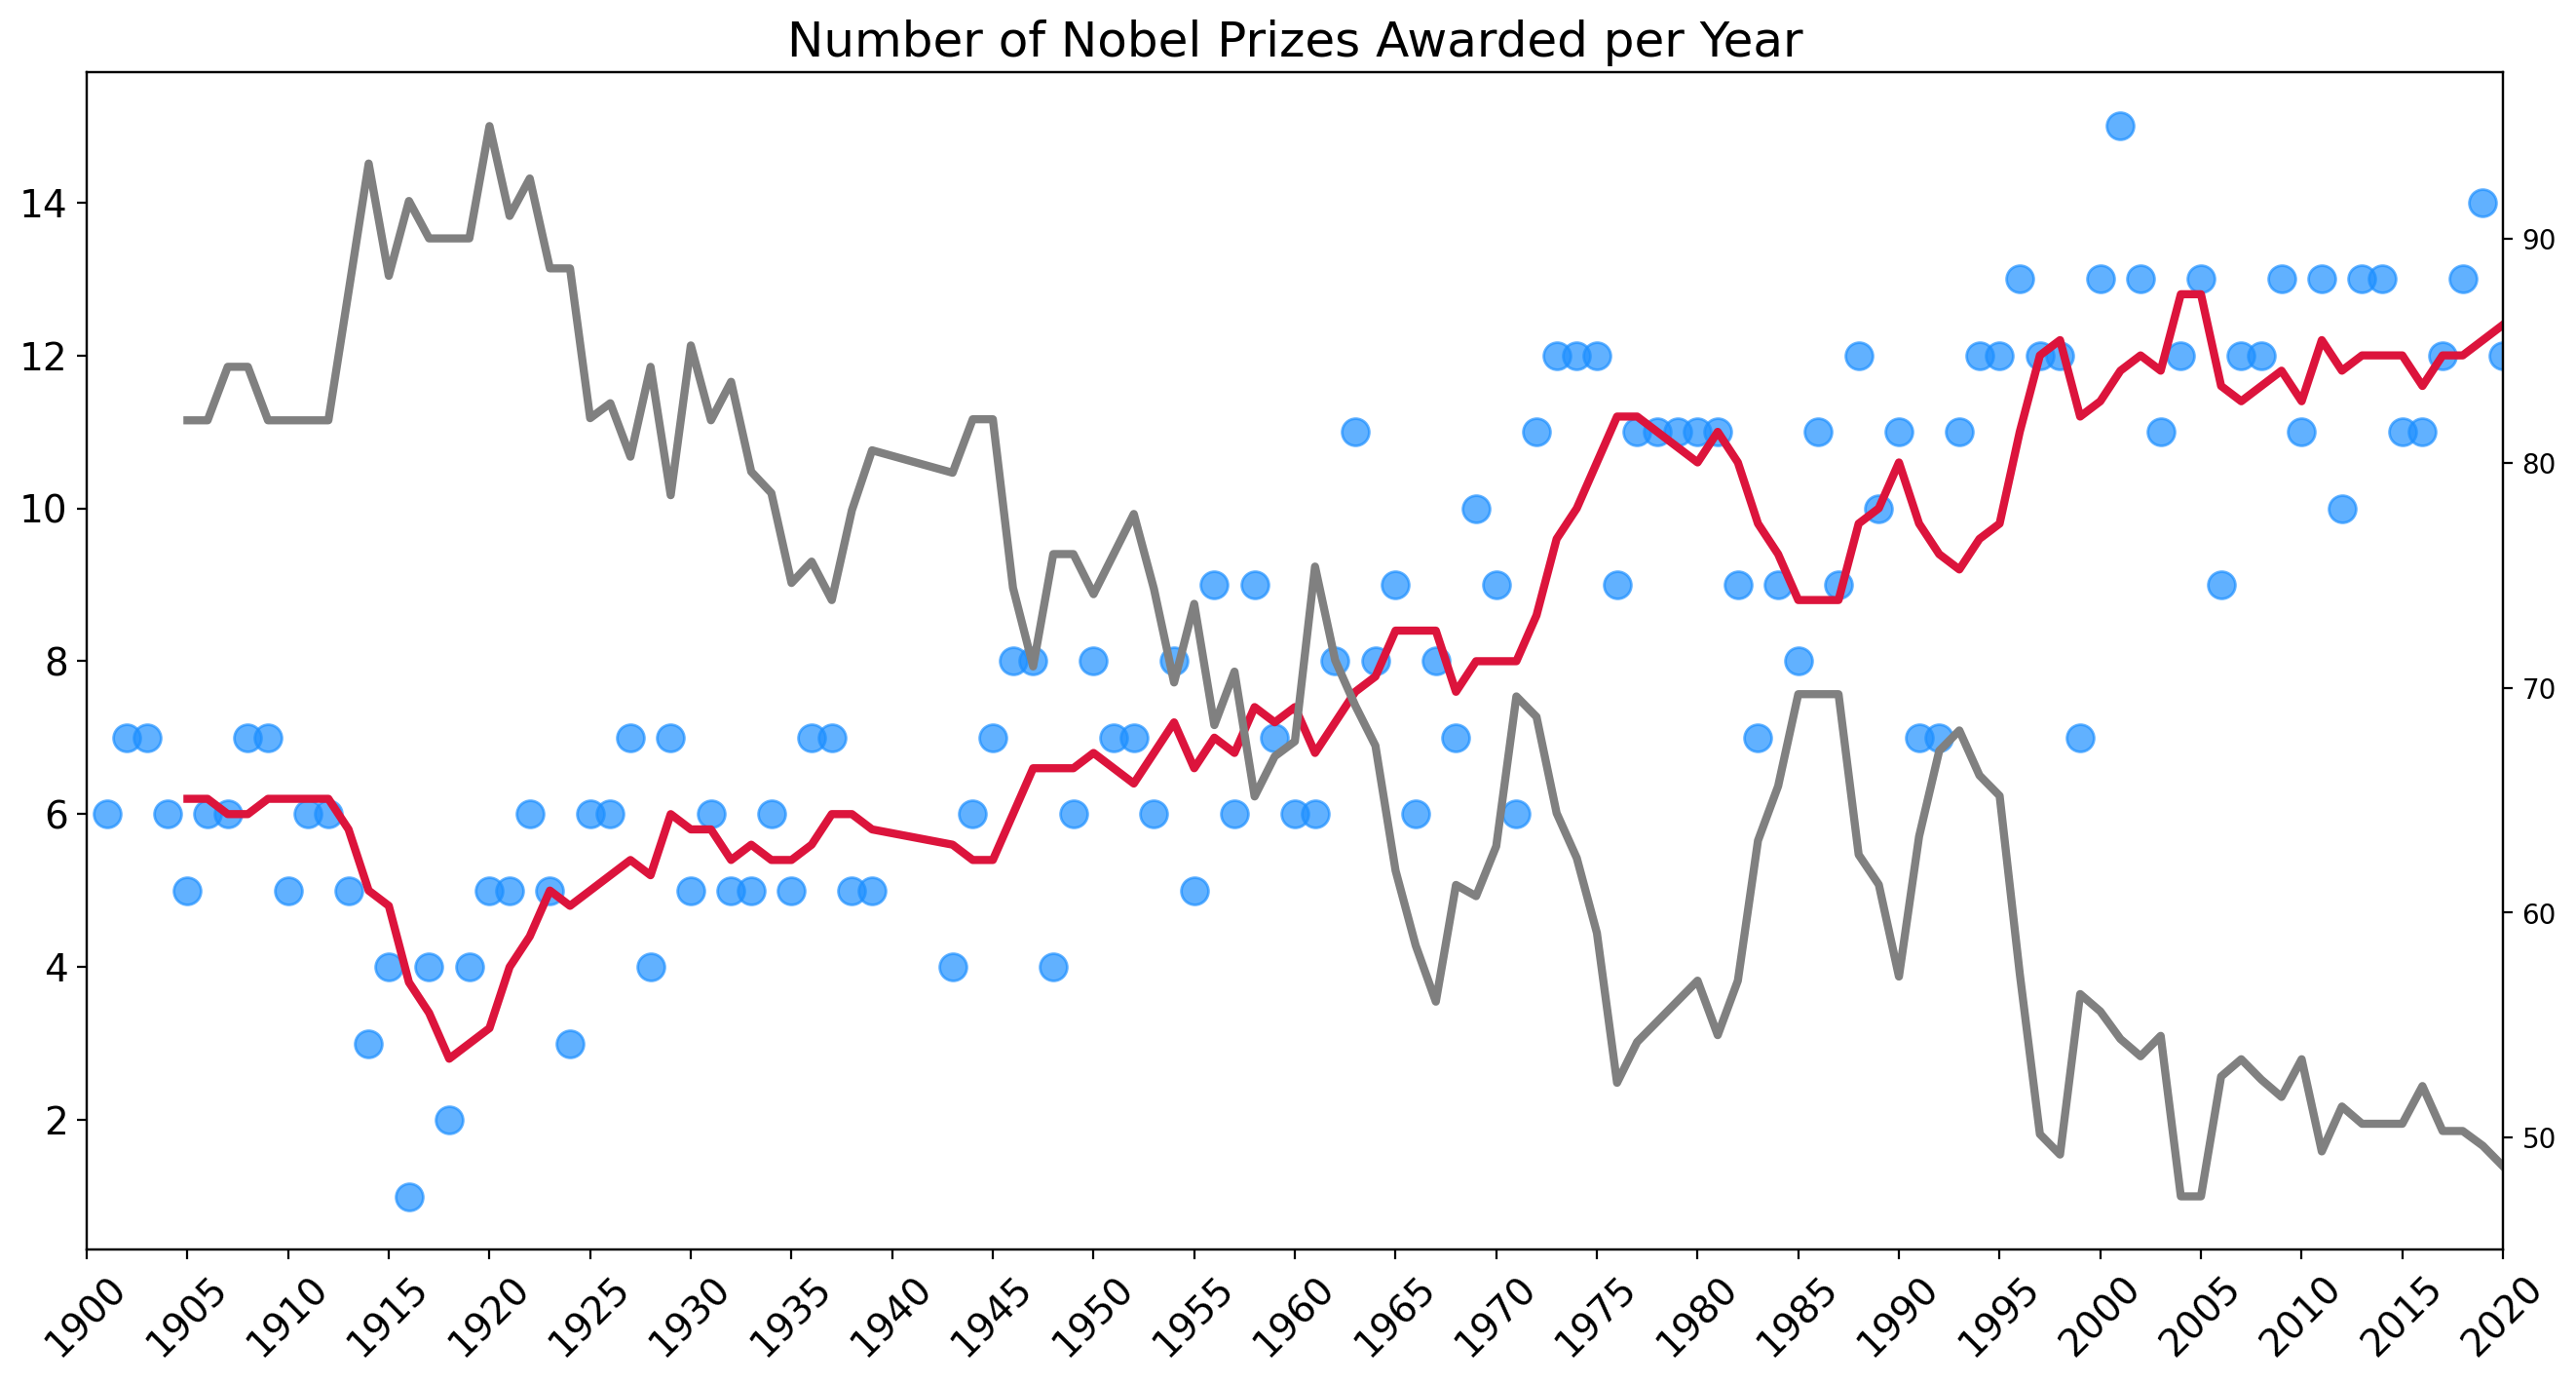

In [34]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)

plt.show()

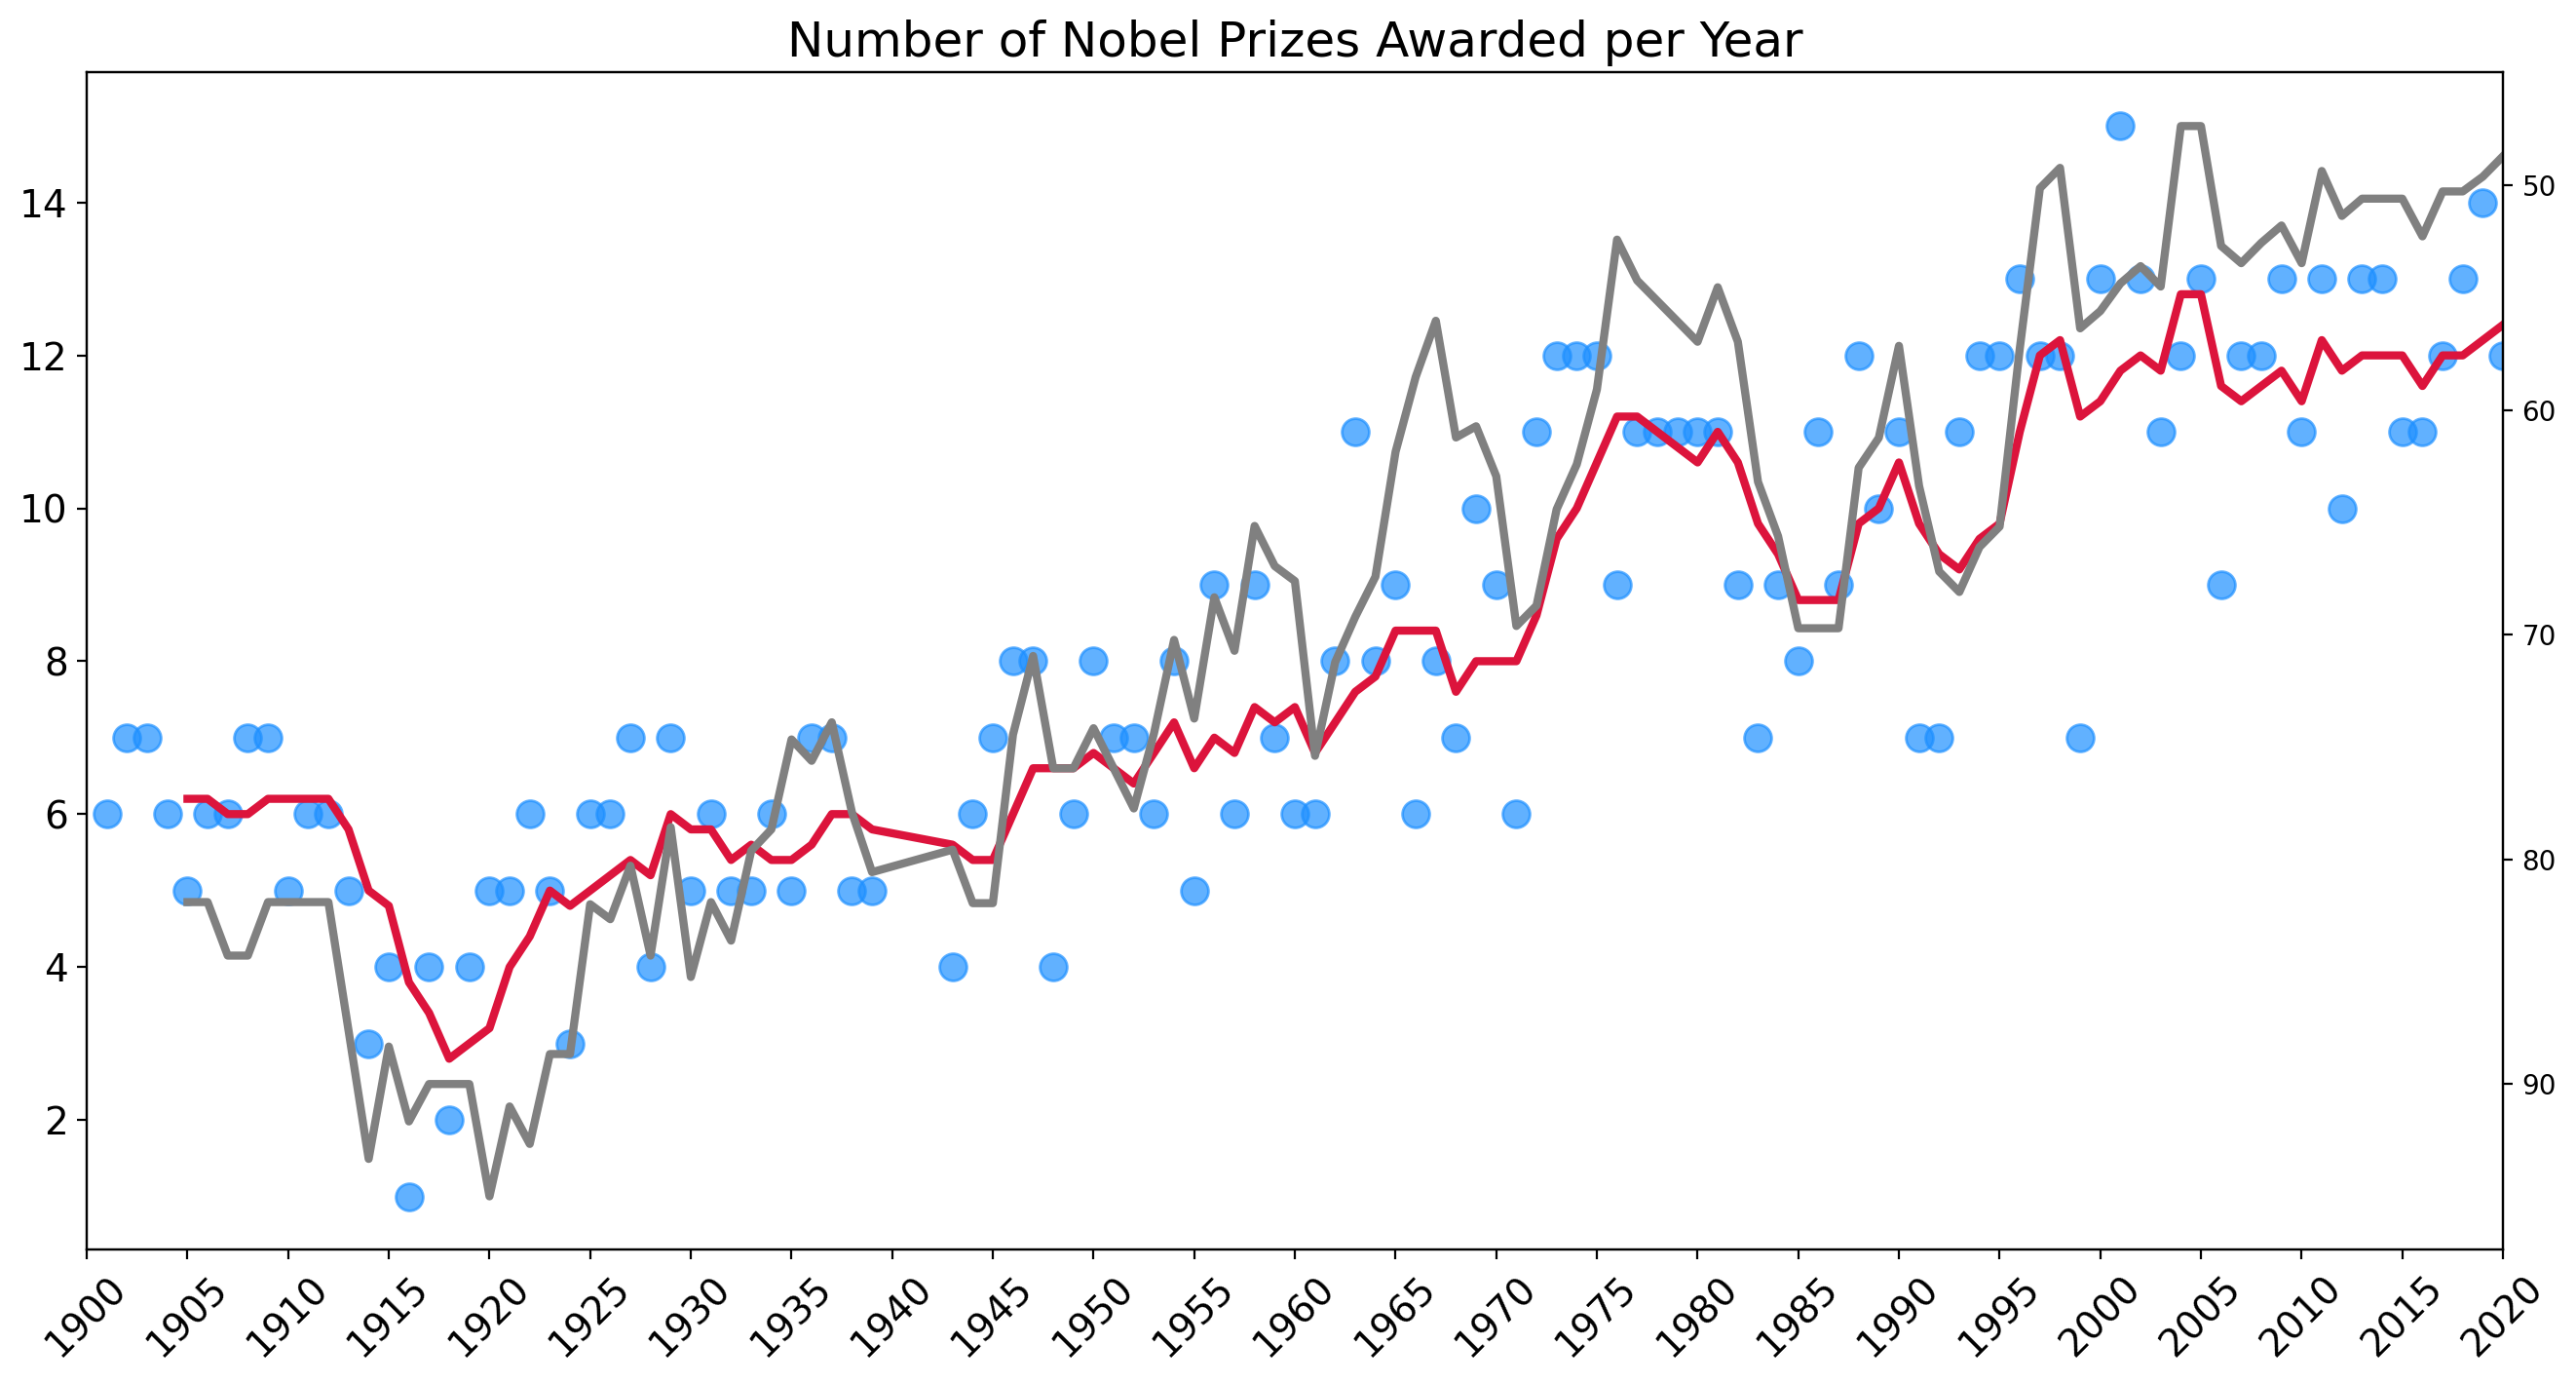

In [35]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
# Can invert axis
ax2.invert_yaxis()
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [36]:
#my solution
top20_countries = df_data.groupby(by='birth_country_current', as_index=False).count()
top20_countries[["birth_country_current", "prize"]]
top20_countries.sort_values(by='prize', inplace=True)
top20_countries = top20_countries[-20:]

In [37]:
fig = px.bar(top20_countries, x=top20_countries.prize, y=top20_countries.birth_country_current, orientation='h')
fig.show()

In [38]:
#solution 
top_countries = df_data.groupby(['birth_country_current'], 
                                    as_index=False).agg({'prize': pd.Series.count})

top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

In [39]:
h_bar = px.bar(x=top20_countries.prize,
                y=top20_countries.birth_country_current,
                orientation='h',
                color=top20_countries.prize,
                color_continuous_scale='Viridis',
                title='Top 20 Countries by Number of Prizes')

h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [40]:
# my solution
# converting birth_country_current to country_iso3 format
import country_converter as coco
cc = coco.CountryConverter()

df = top20_countries
df["country_iso3"] = cc.pandas_convert(series=top20_countries.birth_country_current, to='ISO3')
df.head()

/tmp/ipykernel_10842/3711835119.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,birth_country_current,prize,country_iso3
7,Belgium,9,BEL
31,Hungary,9,HUN
33,India,9,IND
2,Australia,10,AUS
20,Denmark,12,DNK


In [41]:
fig = px.choropleth(df, locations="country_iso3",
                    color="prize", # prize is the number of prize won
                    hover_name="birth_country_current", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

In [42]:
fig = px.choropleth(df, locations="country_iso3",
                    color="prize", # lifeExp is a column of gapminder
                    hover_name="birth_country_current", # column to add to hover information
                    scope="europe",
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

In [43]:
#solution
df_countries = df_data.groupby(['birth_country_current', 'ISO'], 
                                as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [44]:
world_map = px.choropleth(df_countries,
                            locations='ISO',
                            color='prize', 
                            hover_name='birth_country_current', 
                            color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [45]:
#my solution
category_countries = df_data.groupby(by=['birth_country_current', 'category'], as_index=False).count()
category_countries["cat_prize"] = category_countries.prize
category_countries = category_countries[["birth_country_current", "category", "cat_prize"]]
# # category_countries

loop = df_data.groupby(by=['birth_country_current'], as_index=False).count()
nation_list = []
nation_repeated = []
for nation in category_countries["birth_country_current"]:
    nation_repeated.append(nation)
for nation in loop["birth_country_current"]:
    nation_list.append(nation)

nation_count = []
for nation in nation_list:
    nation_count.append(nation_repeated.count(nation))

sum_prize = []
j = 0
for count in nation_count:
    for i in range(count):
        sum_prize.append(loop["prize"][j])
    j += 1

category_countries["total_prize"] = sum_prize
category_countries

,birth_country_current,category,cat_prize,total_prize
0,Algeria,Literature,1,2
1,Algeria,Physics,1,2
2,Argentina,Medicine,2,4
3,Argentina,Peace,2,4
4,Australia,Chemistry,1,10
...,...,...,...,...
206,United States of America,Physics,70,281
207,Venezuela,Medicine,1,1
208,Vietnam,Peace,1,1
209,Yemen,Peace,1,1


In [46]:
category_countries[category_countries["birth_country_current"] == "India"]

,birth_country_current,category,cat_prize,total_prize
88,India,Chemistry,1,9
89,India,Economics,2,9
90,India,Literature,2,9
91,India,Medicine,2,9
92,India,Peace,1,9
93,India,Physics,1,9


In [47]:
category_countries = category_countries[-20:]
fig = px.bar(category_countries, x="cat_prize", y="birth_country_current", color="category")
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [48]:
#solution
cat_country = df_data.groupby(['birth_country_current', 'category'], 
                                as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)

In [49]:
top_countries = df_data.groupby(['birth_country_current'], 
                                    as_index=False).agg({'prize': pd.Series.count})

top_countries.sort_values(by='prize', inplace=True)
# also i suppose to only select the top 20 country first before doing my solution
top20_countries = top_countries[-20:]
# this is the part that am missing, the solution is to merge the total count instead so that the sum prize is repeating
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)

In [50]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                        y=merged_df.birth_country_current,
                        color=merged_df.category,
                        orientation='h',
                        title='Top 20 Countries by Number of Prizes and Category')

cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [51]:
#my solution
year_countries = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
year_countries = year_countries[['birth_country_current', 'year', 'prize']]

In [52]:
fig = px.line(year_countries, x="year", y="prize", color='birth_country_current', title='Number of Prizes Won by Each Country Over Time')
fig.show()
# prize_per_year

In [53]:
#solution
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [54]:
#this is what am missing, the cumulative sum need to be made instead of starting all over again
#groupby(level=[0]) is going to take the first occurance as an index in order to calculate the cumulative sum
#if groupby(level=[1]) it's going to take the second occurance as an index in order to calculate the cumulative sum
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                                'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 

In [55]:
l_chart = px.line(cumulative_prizes,
                    x='year', 
                    y='prize',
                    color='birth_country_current',
                    hover_name='birth_country_current')

l_chart.update_layout(xaxis_title='Year',
                        yaxis_title='Number of Prizes')

l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [56]:
#my solution
top20_organisations = df_data.groupby(by='organization_name', as_index=False).count()
top20_organisations = top20_organisations.sort_values("prize")
top20_organisations = top20_organisations[-20:]

In [57]:
fig = px.bar(top20_organisations, x="prize", y="organization_name")
fig.show()

In [58]:
#solution
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [59]:
org_bar = px.bar(x = top20_orgs.values,
                    y = top20_orgs.index,
                    orientation='h',
                    color=top20_orgs.values,
                    color_continuous_scale=px.colors.sequential.haline,
                    title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes', 
                        yaxis_title='Institution',
                        coloraxis_showscale=False)
org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [60]:
#my solution
top20_organisations_city = df_data.groupby(by='organization_city', as_index=False).count()
top20_organisations_city = top20_organisations_city.sort_values("prize")
top20_organisations_city = top20_organisations_city[-20:]

In [61]:
fig = px.bar(top20_organisations_city, x="prize", y="organization_city")
fig.show()

In [62]:
#solution
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                    y = top20_org_cities.index,
                    orientation='h',
                    color=top20_org_cities.values,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Which Cities Do the Most Research?')

city_bar2.update_layout(xaxis_title='Number of Prizes', 
                        yaxis_title='City',
                        coloraxis_showscale=False)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [63]:
#my solution
top20_birth_city = df_data.groupby(by='birth_city', as_index=False).count()
top20_birth_city = top20_birth_city.sort_values("prize")
top20_birth_city = top20_birth_city[-20:]

In [64]:
fig = px.bar(top20_birth_city, x="prize", y="birth_city")
fig.show()

In [65]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                    y=top20_cities.index,
                    orientation='h',
                    color=top20_cities.values,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Where were the Nobel Laureates Born?')

city_bar.update_layout(xaxis_title='Number of Prizes', 
                        yaxis_title='City of Birth',
                        coloraxis_showscale=False)
city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [66]:
#my solution
group_organisations = df_data.groupby(by=['organization_country', "organization_city", 'organization_name'], as_index=False).count()
group_organisations


,organization_country,organization_city,organization_name,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,ISO,share_pct
0,Argentina,Buenos Aires,Institute for Biochemical Research,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Australia,Canberra,Australian National University,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,United States of America,"West Lafayette, IN",Purdue University,2,2,2,2,2,2,2,2,2,2,2,2,2,2
287,United States of America,"Wilmington, DE",Du Pont,1,1,1,1,1,1,1,1,1,1,1,1,1,1
288,United States of America,"Woods Hole, MA",Marine Biological Laboratory (MBL),1,1,1,1,1,1,1,1,1,1,1,1,1,1
289,United States of America,"Worcester, MA",University of Massachusetts Medical School,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [67]:
fig = px.sunburst(
    group_organisations,
    path=['organization_country', 'organization_city', 'organization_name'], values='prize'
)
fig.show()

In [68]:
#solution
country_city_org = df_data.groupby(by=['organization_country', 
                                        'organization_city', 
                                        'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = country_city_org.sort_values('prize', ascending=False)

In [69]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                    )

burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [140]:
#my solution
winning_age = df_data[["year", "full_name", "birth_date", "motivation"]]
winning_age["win_age"] = df_data["year"] - df_data["birth_date"].dt.year
winning_age.head()

/tmp/ipykernel_10842/2145089074.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,full_name,birth_date,motivation,win_age
0,1901,Jacobus Henricus van 't Hoff,1852-08-30,"""in recognition of the extraordinary services ...",49.00
1,1901,Sully Prudhomme,1839-03-16,"""in special recognition of his poetic composit...",62.00
2,1901,Emil Adolf von Behring,1854-03-15,"""for his work on serum therapy, especially its...",47.00
3,1901,Frédéric Passy,1822-05-20,NaN,79.00
4,1901,Jean Henry Dunant,1828-05-08,NaN,73.00


In [142]:
#solution
birth_years = df_data.birth_date.dt.year
df_data['winning_age'] = df_data.year - birth_years

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [143]:
#my solution
winning_age = winning_age.sort_values(by=['win_age'])
winning_age.head()

,year,full_name,birth_date,motivation,win_age
885,2014,Malala Yousafzai,1997-07-12,"""for their struggle against the suppression of...",17.00
85,1915,William Lawrence Bragg,1890-03-31,"""for their services in the analysis of crystal...",25.00
932,2018,Nadia Murad,1993-07-02,“for their efforts to end the use of sexual vi...,25.00
305,1957,Tsung-Dao (T.D.) Lee,1926-11-24,"""for their penetrating investigation of the so...",31.00
171,1933,Paul Adrien Maurice Dirac,1902-08-08,"""for the discovery of new productive forms of ...",31.00


In [144]:
winning_age = winning_age.sort_values(by=['win_age'], ascending=False)
winning_age.head()

,year,full_name,birth_date,motivation,win_age
937,2019,John Goodenough,1922-07-25,“for the development of lithium-ion batteries”,97.00
933,2018,Arthur Ashkin,1922-09-02,“for the optical tweezers and their applicatio...,96.00
794,2007,Leonid Hurwicz,1917-08-21,"""for having laid the foundations of mechanism ...",90.00
856,2012,Lloyd S. Shapley,1923-06-02,"""for the theory of stable allocations and the ...",89.00
961,2020,Roger Penrose,1931-08-08,“for the discovery that black hole formation i...,89.00


In [147]:
print(f"The average winning age is : {winning_age['win_age'].mean()}")

The average winning age is : 59.94860813704497


In [148]:
winning_age['win_age'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: win_age, dtype: float64

In [146]:
#solution
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,33.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,50.00,17.00


<AxesSubplot:xlabel='win_age', ylabel='Count'>

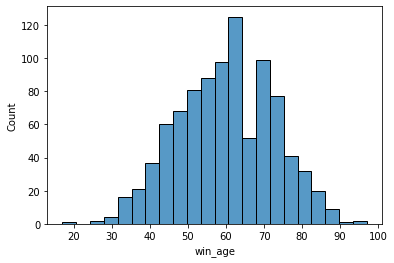

In [157]:
#my solution
sns.histplot(winning_age, x="win_age")

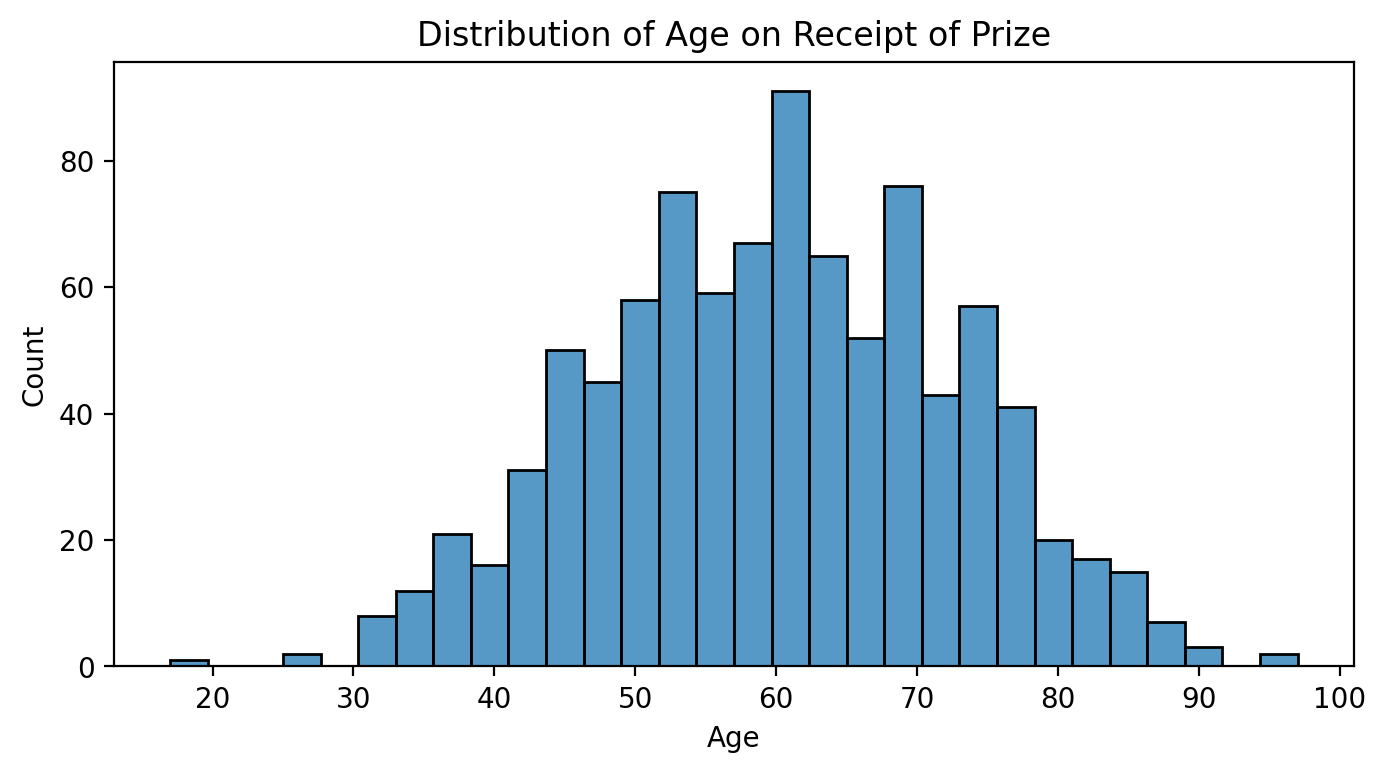

In [158]:
#solution
#what i learn from solution is that you can integrate matplotlib along with seaborn
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
                x=df_data.winning_age,
                bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [150]:
winning_age["win_age"].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: win_age, dtype: float64

<AxesSubplot:>

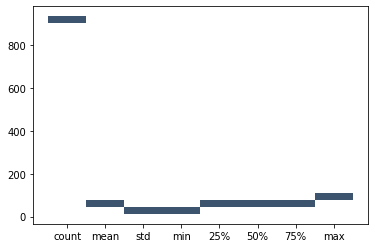

In [151]:
#this is actually not needed my solution on top already satisfy the challenge
descriptive_statistics = winning_age["win_age"].describe()
sns.histplot(descriptive_statistics, x=descriptive_statistics.index, y=descriptive_statistics.values)

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


<AxesSubplot:xlabel='year', ylabel='win_age'>

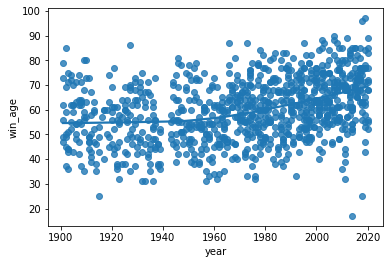

In [159]:
#my solution
sns.regplot(winning_age, x="year", y="win_age", lowess=True)

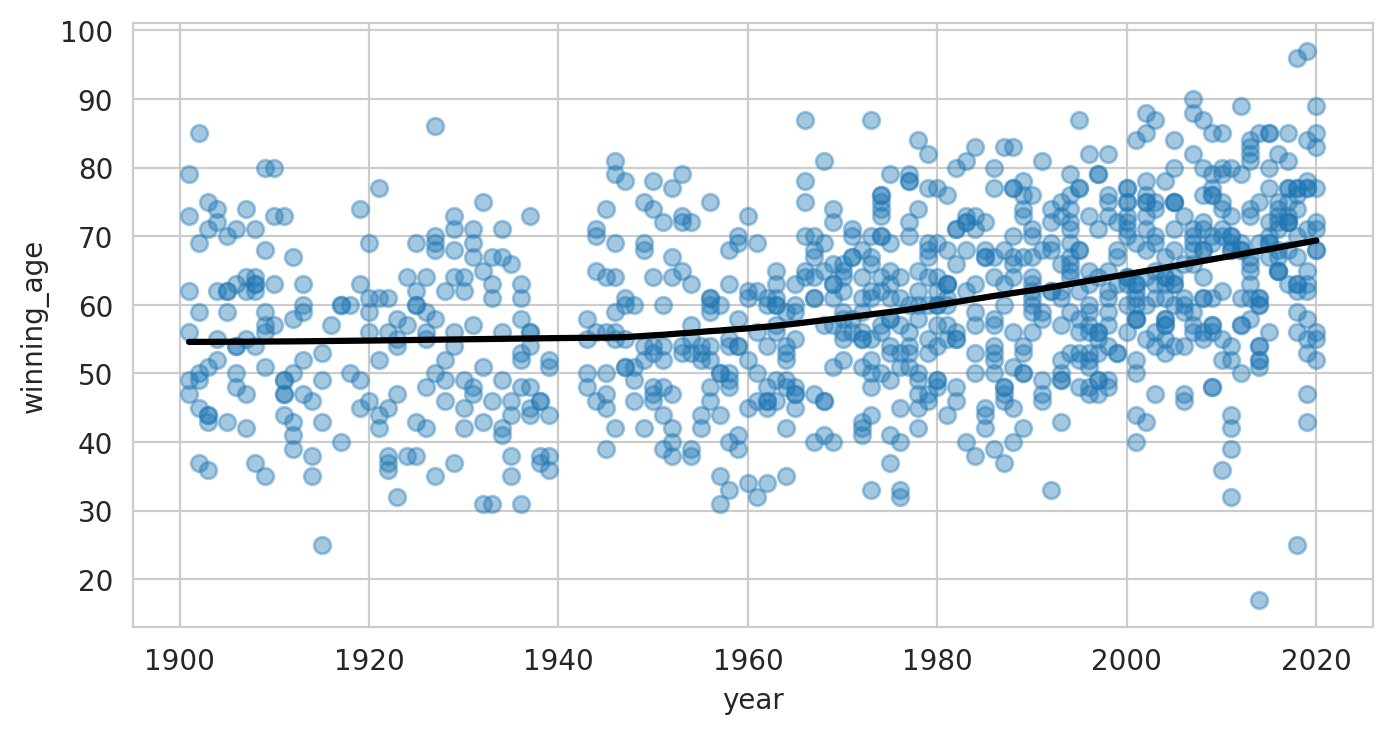

In [160]:
#solution
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

In [153]:
cat_age = df_data[["year", "full_name", "birth_date", "motivation", "category"]]
cat_age["win_age"] = df_data["year"] - df_data["birth_date"].dt.year
cat_age.head()

/tmp/ipykernel_10842/2074230758.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,full_name,birth_date,motivation,category,win_age
0,1901,Jacobus Henricus van 't Hoff,1852-08-30,"""in recognition of the extraordinary services ...",Chemistry,49.00
1,1901,Sully Prudhomme,1839-03-16,"""in special recognition of his poetic composit...",Literature,62.00
2,1901,Emil Adolf von Behring,1854-03-15,"""for his work on serum therapy, especially its...",Medicine,47.00
3,1901,Frédéric Passy,1822-05-20,NaN,Peace,79.00
4,1901,Jean Henry Dunant,1828-05-08,NaN,Peace,73.00


<AxesSubplot:xlabel='win_age', ylabel='category'>

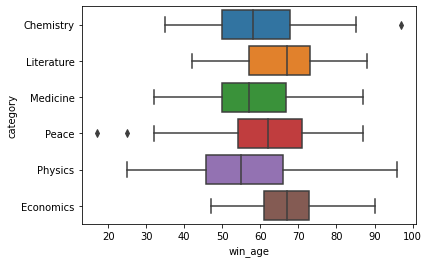

In [161]:
#my solution
sns.boxplot(cat_age, x="win_age", y="category")

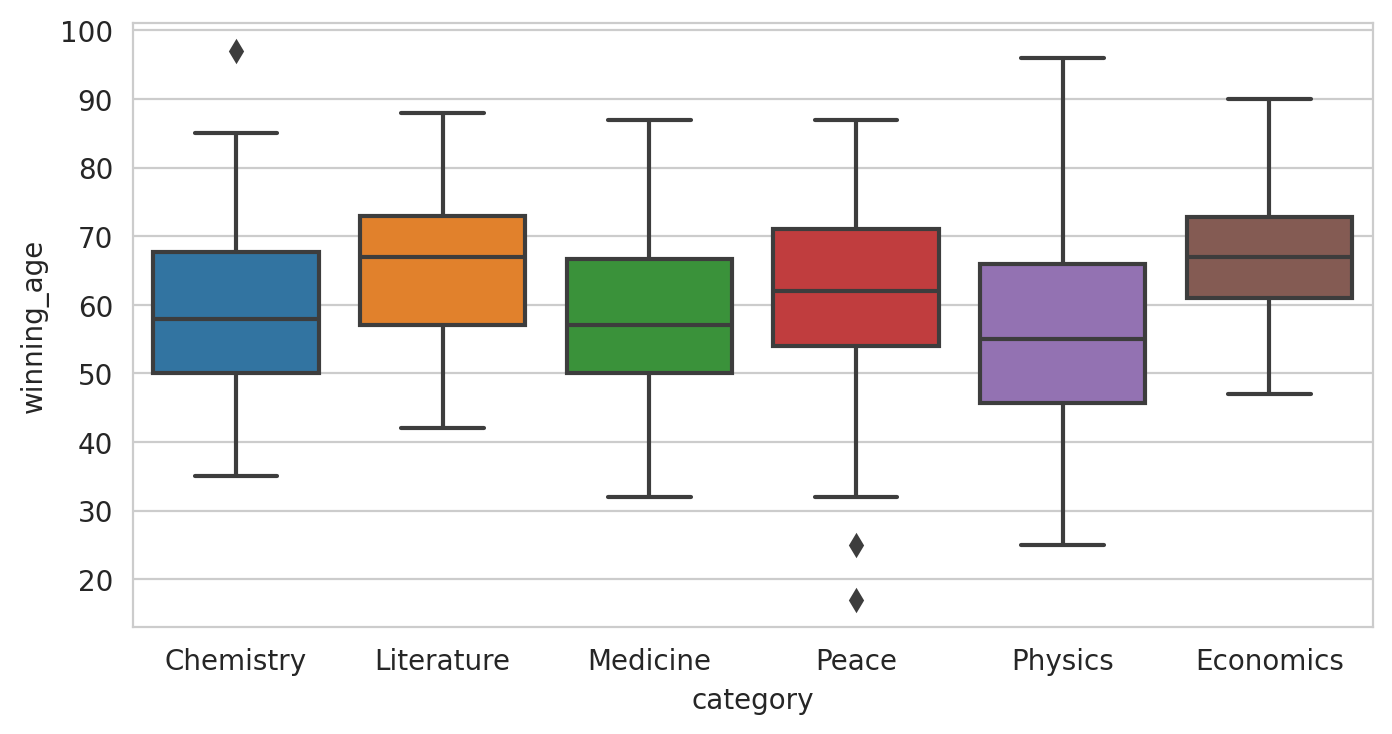

In [162]:
#solution
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')

plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


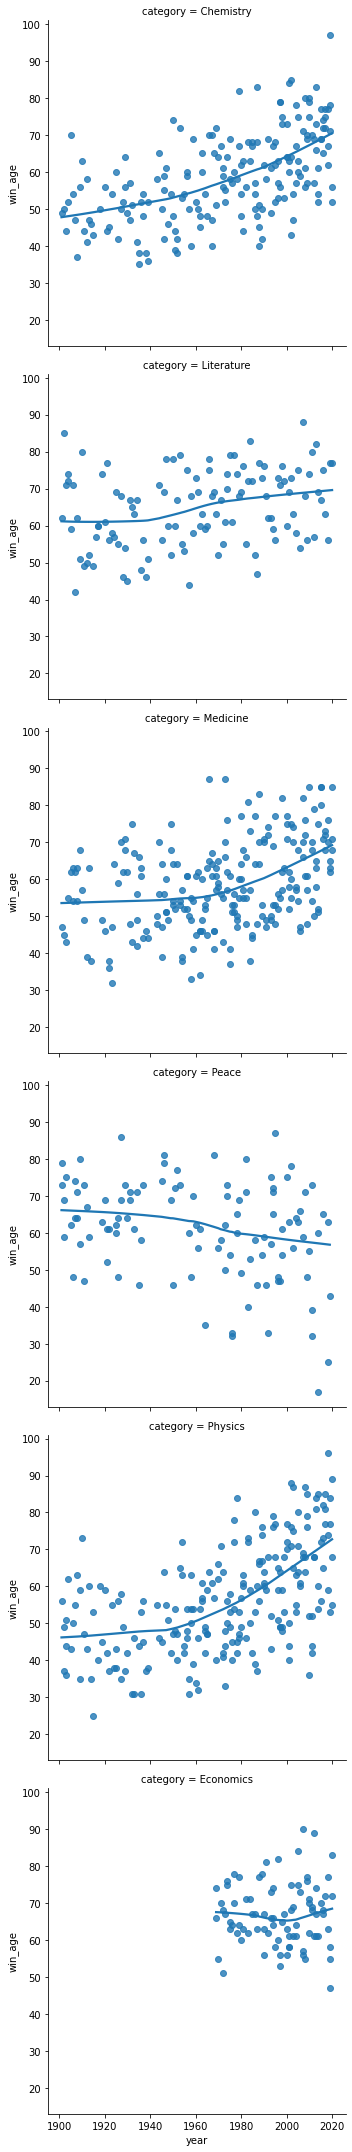

In [163]:
#my solution
sns.lmplot(cat_age, x="year", y="win_age", row="category", lowess=True)

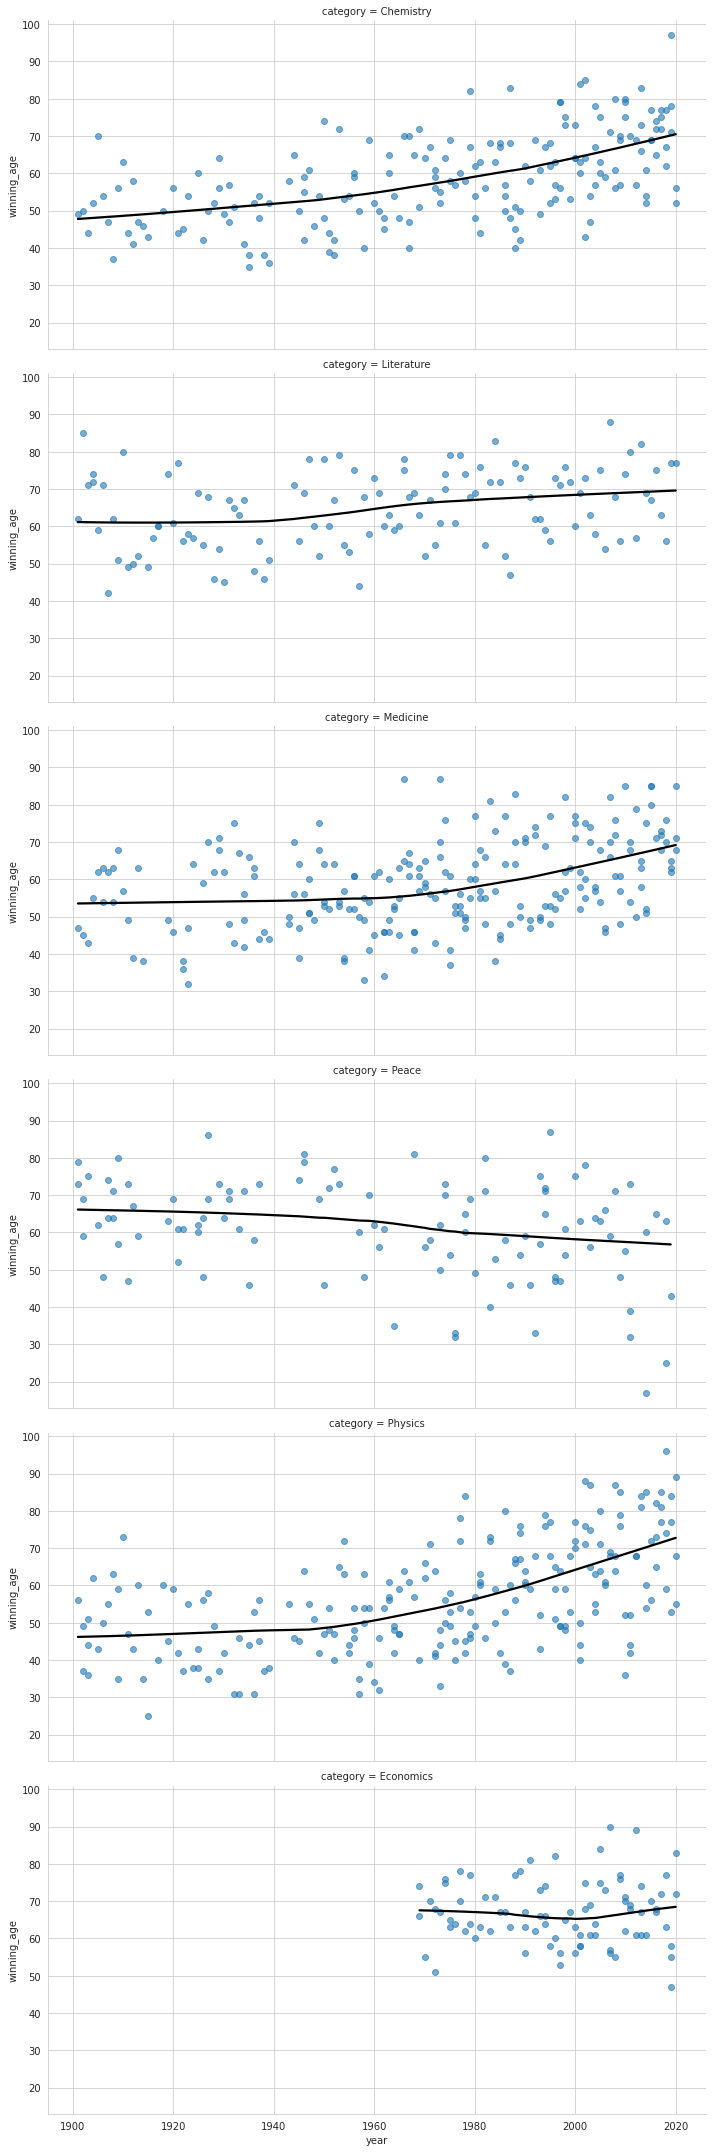

In [164]:
#solution
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
                x='year', 
                y='winning_age',
                row = 'category',
                lowess=True, 
                aspect=2,
                scatter_kws = {'alpha': 0.6},
                line_kws = {'color': 'black'},)

plt.show()

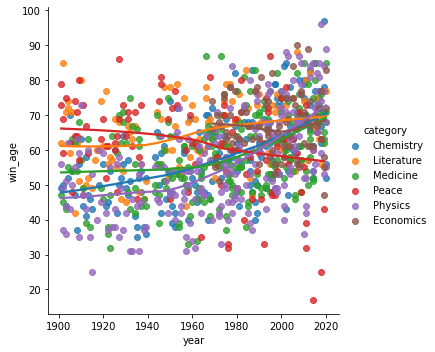

In [156]:
#my solution
sns.lmplot(cat_age, x="year", y="win_age", hue="category", lowess=True)

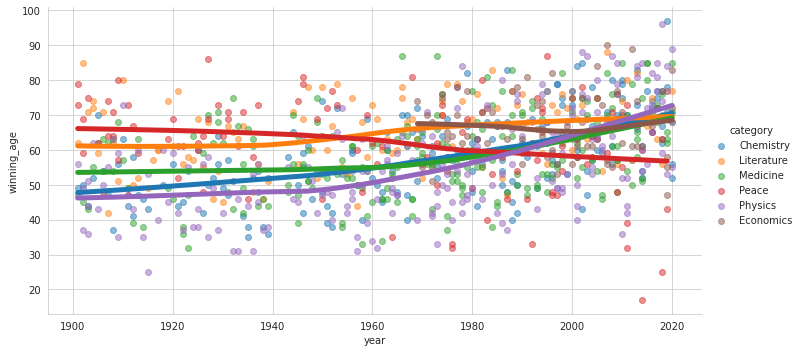

In [165]:
#solution
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
                x='year',
                y='winning_age',
                hue='category',
                lowess=True, 
                aspect=2,
                scatter_kws={'alpha': 0.5},
                line_kws={'linewidth': 5})

plt.show()